The purpose of this notebook is to extract correlation values form the himalaya pipeline.
Using the Glasser ROIs

In [53]:
import os, glob
from os.path import join
import numpy as np
import pandas as pd
import seaborn as sns

from neuromaps.datasets import fetch_fslr
import numpy as np
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
import matplotlib.pyplot as plt

In [73]:
roi_order = ["V1", "LOC", "FFC", "PHG", "pSTS", "TPJ", "PPC", "AIP", "vPM", "SM"]

In [55]:
roi_dict = {
    "V1": [1],             # Primary Visual
    "FFC": [18],           # Fusiform   
    "PHG": [126,155,127],  # ParaHippocampal Gyrus   
    #"MT/MST": [2,23],      # Medial Superior Temporal Area, Middle Temporal Area
    "LOC": [140,141,157,156,159,2,23],
    "pSTS": [28,139],       # posterior superior temporal sulcus
    "PPC": [13, 19, 16, 17], # posterior parietal (V3A, V7, IPS1)
    "TPJ": [149,150,151],  # Area TemporoParietoOccipital	Junction 1, 2, 3
    "AIP": [117, 116, 148, 147], # Anterior Intraparietal "PF": [ # PFT, PF, PF
    "SM": [8,9,51,52,53],           # 8: Primary Motor Cortex, Primary	Sensory	Cortex
    "vPM": [78,80],       # ventral Premotor6r, IFJP, 43, 6v
   
        }

In [56]:
def plot_roi(roi_name, lh_labels, rh_labels, roi_dict, surfaces):
    # roi_name = "TPJ"
    lh, rh = surfaces
    p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral'], mirror_views=True)
    # fig = p.build()
    lh_roi_map = np.full(lh_labels.shape, np.nan)
    lh_roi_map[np.in1d(lh_labels, roi_dict[roi_name])] = 1

    rh_roi_map = np.full(rh_labels.shape, np.nan)
    rh_roi_map[np.in1d(rh_labels, roi_dict[roi_name])] = 1
    # plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
    p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
    fig = p.build()
    fig.show()

In [57]:
main_dir = '/Volumes/life-encoding'
subjects = ['sub-rid000001', 'sub-rid000005', 'sub-rid000006',
            'sub-rid000009', 'sub-rid000012', 'sub-rid000014',
            'sub-rid000017', 'sub-rid000019', 'sub-rid000024',
            'sub-rid000027', 'sub-rid000031', 'sub-rid000032',
            'sub-rid000033', 'sub-rid000034', 'sub-rid000036',
            'sub-rid000037', 'sub-rid000038', 'sub-rid000041']
runs = [1,2,3,4]
hemis = ['lh', 'rh']
features = ['bg', 'agents', 'actions']

## load MMP1

In [58]:
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

## compile results

In [59]:
results = {
    "encoding performance (r)":[],
    "ROI":[],
    "subject":[],
    "hemisphere": [],
    "features": [],
    "run": []
           }


for subject in subjects:
    for hemi in hemis:
        for run in runs:
            for feature in features:
                for roi_name in roi_dict:
                    result_dir = join(main_dir, 'results', 'himalaya', f"single-{feature}moten", "ha_common_pca-40")
                    fname_pattern = f"{feature}-r_feature-{feature}moten_pca-40_align-ha_common_{subject}_run-{run}_hemi-{hemi}.npy" 
                    data = np.load(join(result_dir, fname_pattern))
                    if hemi == 'lh':
                        labels = lh_labels
                    elif hemi == 'rh':
                        labels = rh_labels
                    roi_map = np.full(labels.shape, False)
                    roi_map[np.in1d(labels, roi_dict[roi_name])] = True

                    results['encoding performance (r)'].append(np.mean(data[0, roi_map])) 
                    results['ROI'].append(roi_name)
                    results['subject'].append(subject)
                    results['hemisphere'].append(hemi)
                    results['features'].append(feature)
                    results['run'].append(str(run))
            # print(f"finished loading results for {subject}, {hemi}, {run}")


In [60]:
results_df = pd.DataFrame(results)

In [61]:
results_df

,encoding performance (r),ROI,subject,hemisphere,features,run
0,0.027386,V1,sub-rid000001,lh,bg,1
1,0.101157,FFC,sub-rid000001,lh,bg,1
2,0.039645,PHG,sub-rid000001,lh,bg,1
3,0.051297,LOC,sub-rid000001,lh,bg,1
4,-0.002172,pSTS,sub-rid000001,lh,bg,1
...,...,...,...,...,...,...
4315,0.006264,PPC,sub-rid000041,rh,actions,4
4316,0.039261,TPJ,sub-rid000041,rh,actions,4
4317,0.051116,AIP,sub-rid000041,rh,actions,4
4318,0.014049,SM,sub-rid000041,rh,actions,4


In [62]:
# results_df.to_csv()

In [63]:
results_df[results_df['features'] == 'actions']

,encoding performance (r),ROI,subject,hemisphere,features,run
20,0.015424,V1,sub-rid000001,lh,actions,1
21,0.008394,FFC,sub-rid000001,lh,actions,1
22,-0.012613,PHG,sub-rid000001,lh,actions,1
23,0.037679,LOC,sub-rid000001,lh,actions,1
24,0.058311,pSTS,sub-rid000001,lh,actions,1
...,...,...,...,...,...,...
4315,0.006264,PPC,sub-rid000041,rh,actions,4
4316,0.039261,TPJ,sub-rid000041,rh,actions,4
4317,0.051116,AIP,sub-rid000041,rh,actions,4
4318,0.014049,SM,sub-rid000041,rh,actions,4


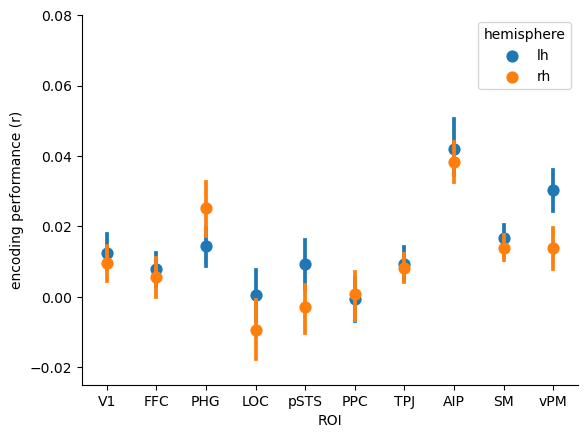

In [70]:
sns.pointplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              join=False)
plt.ylim(-0.025, 0.08)
sns.despine()

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

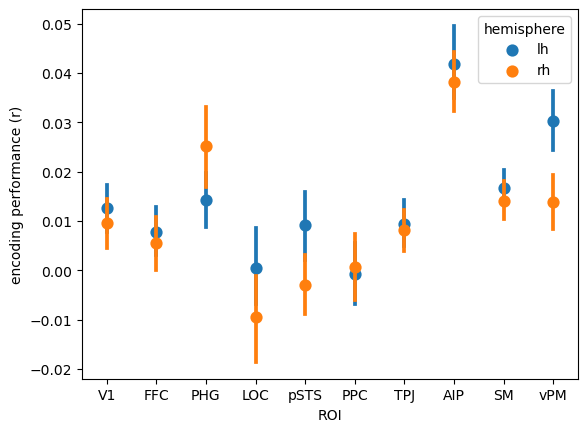

In [65]:
sns.pointplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              join=False)
plt.ylim(-0.025, 0.08)
sns.despine()

### barplot: actions

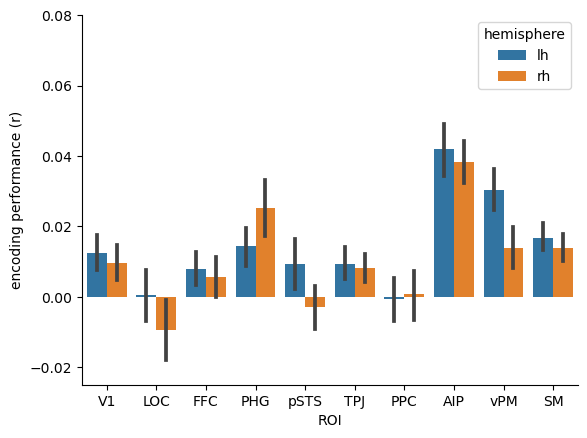

In [74]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'actions'],
              order=roi_order
            )
plt.ylim(-0.025, 0.08)
sns.despine()

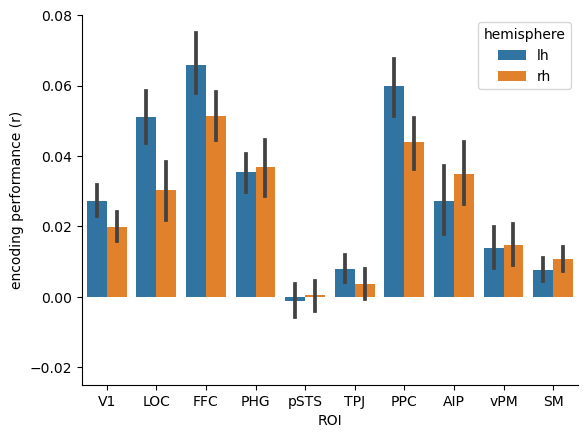

In [75]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'bg'],
              order=roi_order
            )
plt.ylim(-0.025, 0.08)
sns.despine()

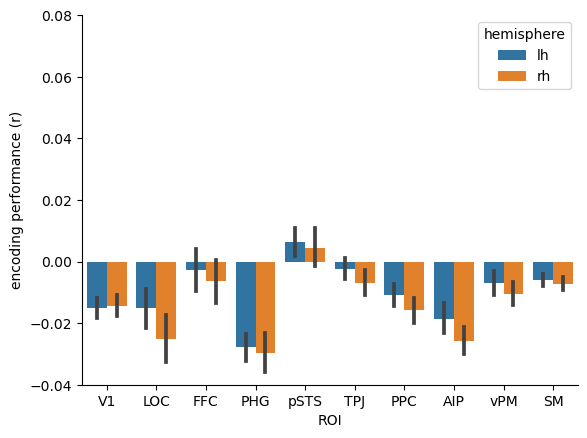

In [78]:
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="hemisphere",
              data=results_df[results_df['features'] == 'agents'],
              order=roi_order
            )
plt.ylim(-0.04, 0.08)
sns.despine()

### barplot

<Axes: xlabel='ROI', ylabel='encoding performance (r)'>

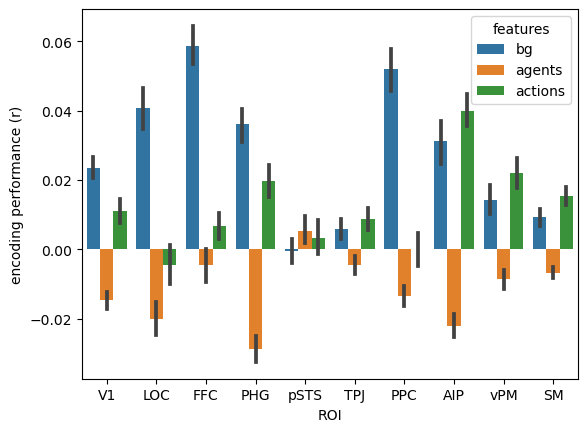

In [79]:
#hue = features
sns.barplot(x="ROI", 
              y="encoding performance (r)", 
              hue="features",
              data=results_df,
              order=roi_order
            )
